In [40]:
import pandas as pd
import numpy as np
import seaborn as sns



In [62]:
from sklearn.model_selection import train_test_split


from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
plt.rcParams.update({'figure.figsize' : (12.0, 8.0)})
plt.rcParams.update({'font.size' : 14})

In [3]:
#Fetching the pre processed dataset
df = pd.read_parquet('/Users/piyush/StudienArbeit/final_RF.parquet', columns= ['Force1','Force2','Force3','Force4','Force5','Force6','Force7','Force8','Force9','Force10','Force11','Force12','StrainA','StrainB','StrainC','StrainD','StrainE','Strain.1','Strain.2','Strain.3','Strain.4','Strain.5','Strain.6','Strain.7','Strain.8','Strain.9','Strain.10','Strain.11','Strain.12','Strain.13','Strain.14','Strain.15','Strain.16','Strain.17','Strain.18','Strain.19','Strain.20','Strain.21','Strain.22','Strain.23','Strain.24','Strain.25','Strain.26','Strain.27','Strain.28','Strain.29','Strain.30','Strain.31','Strain.32','Strain.33','Strain.34','Strain.35','Strain.36','Strain.37','Strain.38','Strain.39','Strain.40','Strain.41','Strain.42','Strain.43','Strain.44','Strain.45','Strain.46','Strain.47','Strain.48','Strain.49','Strain.50','Strain.51','Strain.52','Strain.53','Strain.54','Strain.55','Strain.56','Strain.57','Strain.58','Strain.59','Strain.60','Strain.61','Strain.62','Strain.63','Strain.64','Strain.65','Strain.66','Strain.67','Strain.68','Strain.69','Strain.70', 'Target'])
print('Shape of the dataset:' +str(df.shape) )
print(df.head(-5))

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])
print(df['Target'].unique())
print(df['Target'].value_counts())



Shape of the dataset:(11646998, 88)
          Force1  Force2  Force3  Force4  Force5  Force6  Force7  Force8  \
0            5.9   -6.20  -23.47   -4.81  -25.11   -6.14     4.3   -3.99   
1            5.9   -6.30  -23.46   -4.72  -25.09   -6.06     4.4   -4.09   
2            5.9   -6.24  -23.55   -4.71  -25.06   -6.09     4.4   -4.04   
3            5.9   -6.38  -23.47   -4.61  -25.05   -6.07     4.4   -4.17   
4            5.8   -6.32  -23.48   -4.63  -25.05   -6.07     4.3   -4.10   
...          ...     ...     ...     ...     ...     ...     ...     ...   
11646988   -82.1 -166.43   12.23  -49.71    0.01  -62.22   -83.4 -164.50   
11646989   -82.0 -166.39   12.26  -49.68   -0.04  -62.34   -83.3 -164.46   
11646990   -81.9 -166.34   12.24  -49.70    0.04  -62.34   -83.2 -164.41   
11646991   -82.0 -166.36   12.27  -49.67    0.03  -62.33   -83.2 -164.48   
11646992   -82.0 -166.35   12.37  -49.63   -0.02  -62.30   -83.2 -164.45   

          Force9  Force10  ...  Strain.62  Strain.6

In [4]:
#Confirming if the data is normalised
print(df.iloc[:, :-1].min().value_counts())
print(df.iloc[:, :-1].max().value_counts())

-20.1000      2
 0.0000       2
-505.7000     1
-309.9000     1
-1070.4000    1
             ..
-8.0400       1
-25.3700      1
 38.7000      1
-0.0016       1
-29.2000      1
Name: count, Length: 85, dtype: int64
 0.00       2
 9.00       1
 870.40     1
 20.50      1
 116.60     1
           ..
 12.50      1
-0.56       1
 49.63      1
 1145.10    1
 300.00     1
Name: count, Length: 86, dtype: int64


In [20]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, 0:86].values
y = df.iloc[: , 87].values

print('The independent feature set: ')
print(X[:5, :])
print('The dependent variable: ')
print(y[:-5])


The independent feature set: 
[[ 5.9000e+00 -6.2000e+00 -2.3470e+01 -4.8100e+00 -2.5110e+01 -6.1400e+00
   4.3000e+00 -3.9900e+00 -2.3920e+01 -1.2000e+00 -2.6890e+01 -7.9900e+00
  -6.6700e+00 -5.4100e+00 -7.9000e-01 -8.1000e-01 -8.4400e+00 -4.2600e+00
  -1.6227e+02 -1.6183e+02  6.9300e+00 -2.7300e+00  0.0000e+00  0.0000e+00
  -7.0000e-02  5.0000e-04  4.0000e+01 -1.4980e+01 -5.2600e+00  5.9000e+00
  -2.9800e+01 -1.0000e-01  0.0000e+00  2.0000e-01  4.0000e-01 -5.0000e-01
   5.0000e-01  0.0000e+00 -1.0000e-01 -1.0000e+00 -9.0000e-01  3.0000e-01
  -1.0000e-01  3.0000e-01 -4.0000e-01  0.0000e+00  0.0000e+00  4.0000e-01
  -1.2000e+00  1.0000e-01  2.0000e-01  1.0000e+00 -1.2000e+00 -1.0000e-01
  -6.0000e-01 -4.0000e-01  1.1000e+00  1.0000e+00  1.0000e-01  0.0000e+00
   0.0000e+00  1.4000e+00  7.0000e-01  7.0000e-01 -8.0000e-01  5.0000e-01
   1.0000e+00  1.4000e+00  1.5000e+00  4.0000e-01  1.5000e+00  1.2000e+00
   8.0000e-01  3.0000e-01  6.0000e-01  7.0000e-01 -1.0000e-01 -9.0000e-01
   1.100

In [16]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)
print(train_data.shape)
print(test_data.shape)

(9317598, 88)
(2329400, 88)


In [21]:
#splitting the dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)
print ('Feature Training Set:', X_train.shape)
print('Feature Testing Set:', X_test.shape)
print('Label Trainhing Set:', y_train.shape)
print('Label Testing Set:', y_test.shape)


Feature Training Set: (9317598, 86)
Feature Testing Set: (2329400, 86)
Label Trainhing Set: (9317598,)
Label Testing Set: (2329400,)


In [22]:
#Fitting Decision tree regressor to the training data
classifier = RandomForestClassifier(n_estimators=100,criterion='gini', max_features= 'sqrt', max_depth= 5, random_state=18)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=18)

In [72]:
#Predicting the test set result
predictions = classifier.predict(X_test)
test_classes = sorted(np.unique(predictions))
predictions
print('accuracy:', accuracy_score(y_test,predictions))




accuracy: 0.9489628230445608


In [36]:
unique = np.unique(y_train)
print(unique)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [53]:
def plot(y_test, predictions):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, predictions),
                         columns = columns, index = index)
    return table
plot(y_test, predictions)

,Predicted 0,Predicted 1,Predicted 2,Predicted 3,Predicted 4,Predicted 5,Predicted 6,Predicted 7,Predicted 8,Predicted 9,...,Predicted 14,Predicted 15,Predicted 16,Predicted 17,Predicted 18,Predicted 19,Predicted 20,Predicted 21,Predicted 22,Predicted 23
Actual 0,247726,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 1,0,164917,44736,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 2,0,16,206254,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 3,0,0,0,0,0,0,0,0,20620,0,...,0,0,0,0,0,0,0,0,0,0
Actual 4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 6,0,0,0,0,0,0,247521,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 7,0,0,0,0,0,0,0,206268,0,0,...,0,0,0,0,0,0,0,0,0,0
Actual 8,0,0,0,0,0,0,0,1,209616,0,...,0,0,0,0,0,0,0,0,0,0
Actual 9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Confusion Matrix for Load Condition')


<Axes: title={'center': 'Confusion Matrix for Load Condition'}>

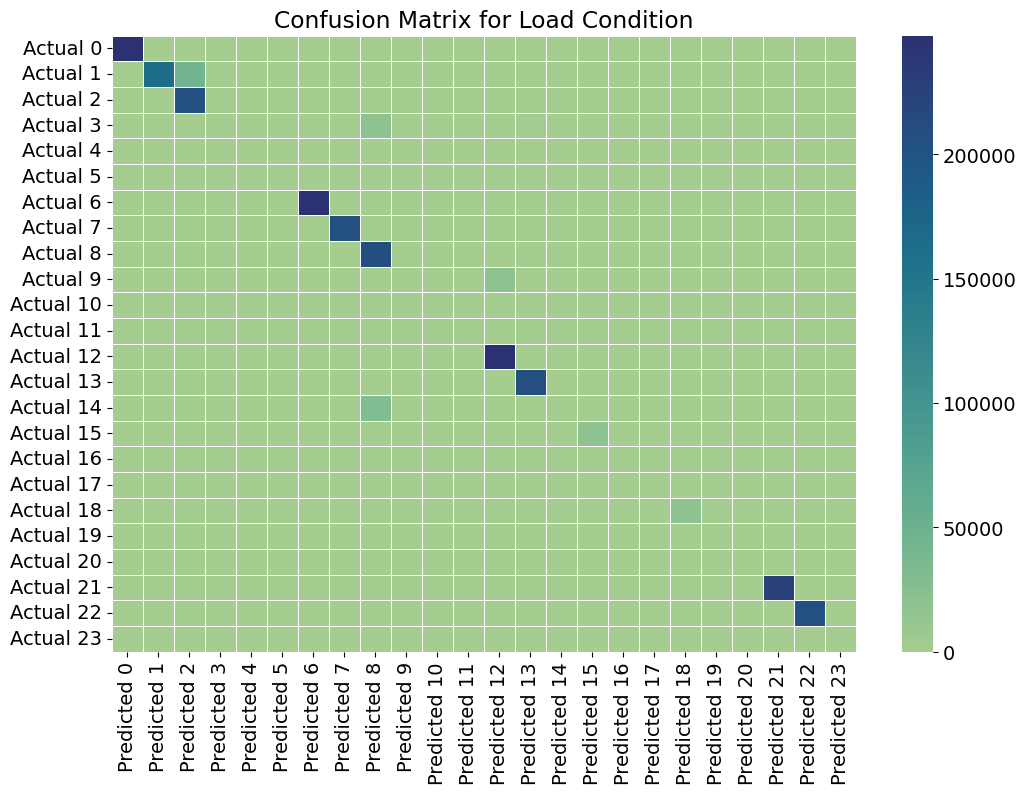

In [76]:
#getting dataframe labels

from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

#combine labels with confusion matrix
def plot(y_test, predictions):
    labels = unique_labels(y_test)
    columns = [f'Predicted {label}' for label in labels]
    index = [f'Actual {label}' for label in labels]
    table = pd.DataFrame(confusion_matrix(y_test, predictions),
                         columns = columns, index = index)
    return sns.heatmap(table, annot=False,fmt='d', cmap='crest', linewidths=0.5)
print(plt.title('Confusion Matrix for Load Condition'))
plot(y_test, predictions)

In [68]:
#print(classification_report(y_test, predictions))

#It does not consider each class individually, It calculates the metrices globally
precision_micro = precision_score(y_test, predictions, average='micro')
f1_micro = f1_score(y_test,predictions, average='micro')
recall_micro = recall_score(y_test, predictions, average='micro')
print('Micro Precission: ', precision_micro)
print('Micro F1-Score: ', f1_micro)
print('Micro Recall: ', recall_micro)

#Macro calculates recall for each class individually and then takes unweighted mean of the measures
precision_macro = precision_score(y_test, predictions, average='macro')
f1_macro = f1_score(y_test,predictions, average='macro')
recall_macro = recall_score(y_test, predictions, average='macro')
print('Macro Precission: ', precision_macro)
print('Macro F1-Score: ', f1_macro)
print('Macro Recall: ', recall_macro)



Micro Precission:  0.9489628230445608
Micro F1-Score:  0.9489628230445608
Micro Recall:  0.9489628230445608


/Users/piyush/StudienArbeit/Arbeit-venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Macro Precission:  0.4807210847940566
Macro F1-Score:  0.4845088157179802
Macro Recall:  0.4911046776044478
